# Churn Prediction Case-study

### Problem Statement - Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.., predict if the customer will churn or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\k.udaya shree\Downloads\churn_dataset.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.drop(["customerID"], inplace = True, axis = 1)

In [9]:
data.loc[data['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
data.TotalCharges = data.TotalCharges.replace(" ",np.nan)
data.TotalCharges.fillna(0, inplace = True)
data.TotalCharges = data.TotalCharges.astype(float)

In [11]:
data.shape

(7043, 20)

In [12]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<AxesSubplot:xlabel='tenure', ylabel='Density'>

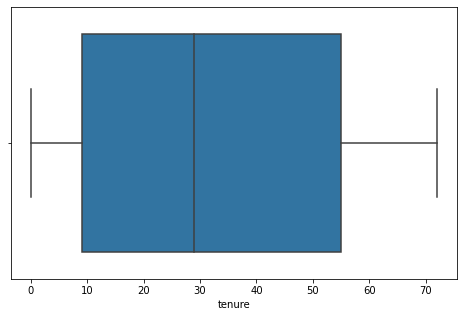

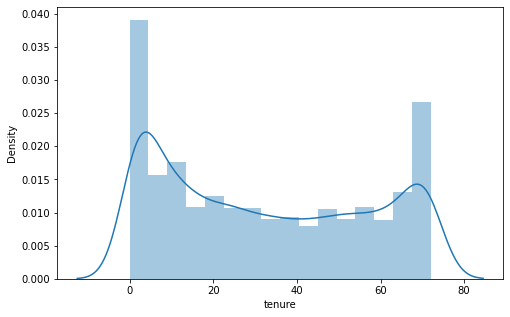

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data.tenure)

fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(data.tenure)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

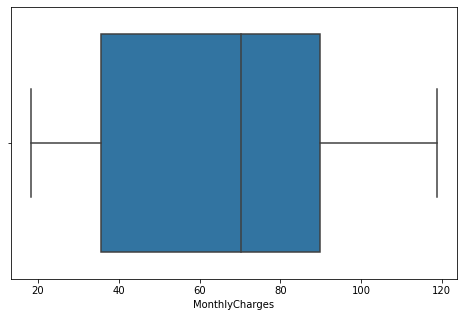

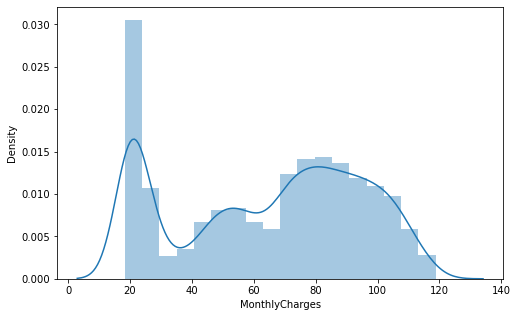

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data.MonthlyCharges)

fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(data.MonthlyCharges)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

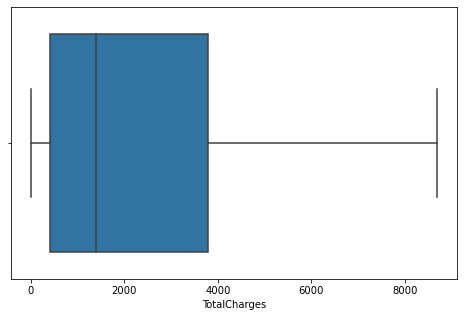

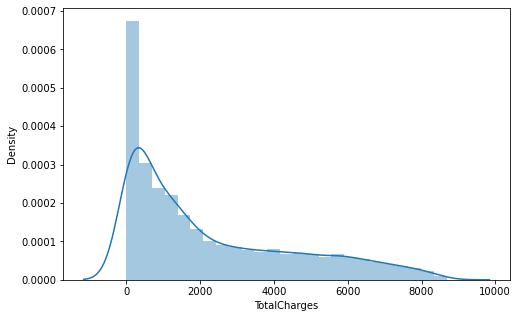

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data.TotalCharges)

fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(data.TotalCharges)

In [17]:
data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

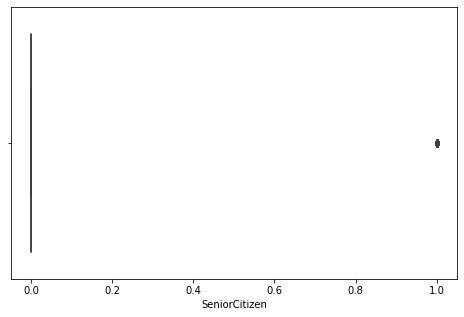

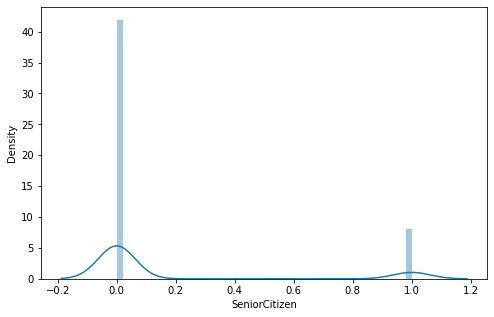

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data.SeniorCitizen)

fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(data.SeniorCitizen)

In [19]:
percentile25 = data['SeniorCitizen'].quantile(0.25)
percentile75 = data['SeniorCitizen'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

0.0
Upper limit 0.0
Lower limit 0.0


In [20]:
data[data['SeniorCitizen'] > upper_limit]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [21]:
data[data['SeniorCitizen'] < lower_limit]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [22]:
data.shape

(7043, 20)

In [23]:
new_data = data.copy()

new_data['SeniorCitizen'] = np.where(new_data['SeniorCitizen'] > upper_limit , upper_limit, 
                                np.where(new_data['SeniorCitizen'] < lower_limit, lower_limit,
                                         new_data['SeniorCitizen']))

In [24]:
new_data.shape

(7043, 20)

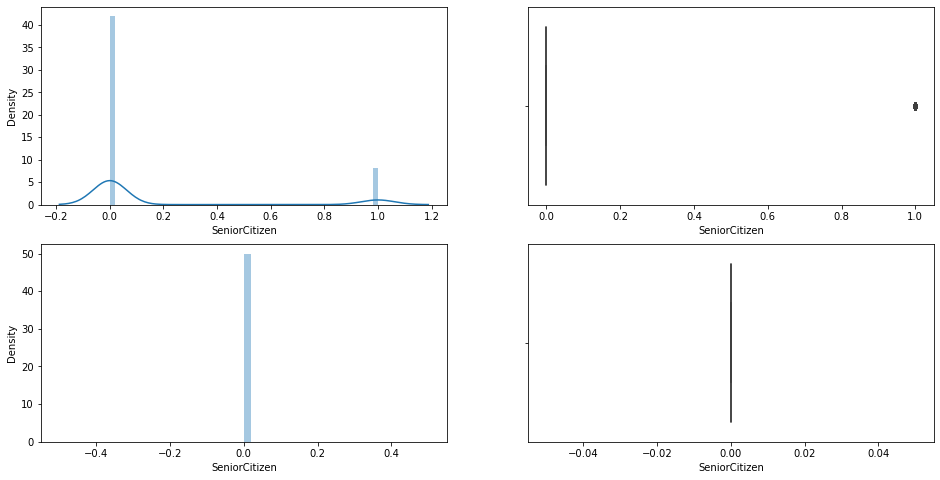

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['SeniorCitizen'])

plt.subplot(2,2,2)
sns.boxplot(data['SeniorCitizen'])

plt.subplot(2,2,3)
sns.distplot(new_data['SeniorCitizen'])

plt.subplot(2,2,4)
sns.boxplot(new_data['SeniorCitizen'])
plt.show()

In [26]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [27]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

#### Gender, SeniorCitizen, Partner, Dependents

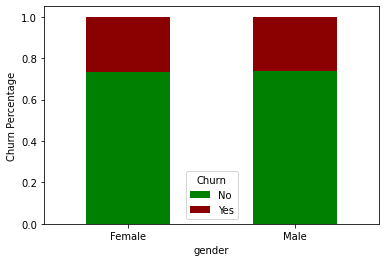

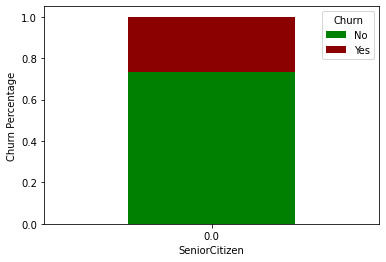

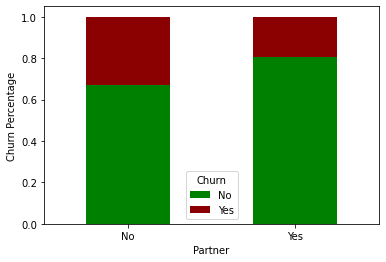

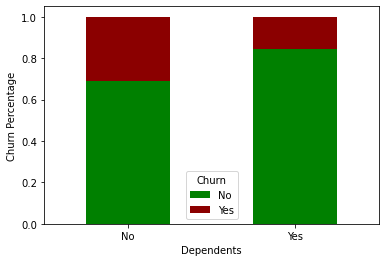

In [28]:
stacked_plot(new_data, "gender", "Churn")
stacked_plot(new_data, "SeniorCitizen", "Churn")
stacked_plot(new_data, "Partner", "Churn")
stacked_plot(new_data, "Dependents", "Churn")

From above plots, we can say following:

Gender alone does not help us predict the customer churn.
If a person is young and has a family, he or she is less likely to stop the service as we can see below. The reason might be the busy life, more money or another factors.

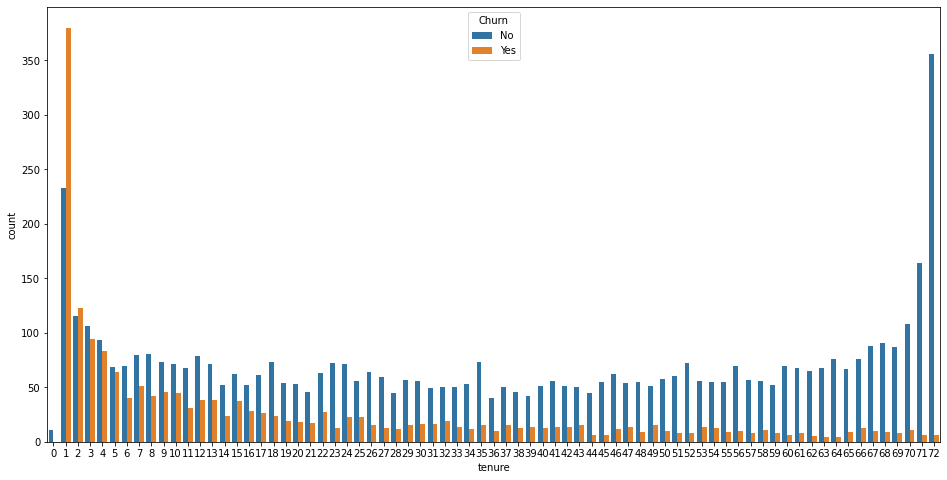

In [29]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=new_data)
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.

#### Phone Service and MultipleLines

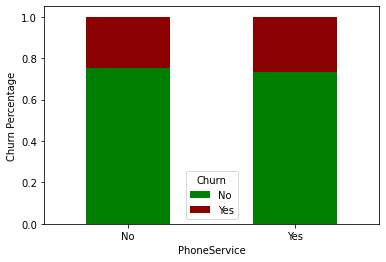

In [30]:
stacked_plot(new_data, "PhoneService", "Churn")

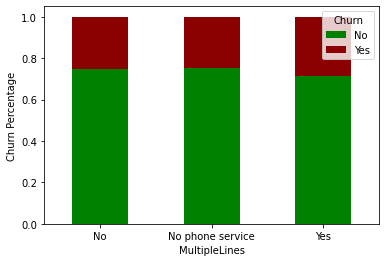

In [31]:
stacked_plot(new_data, "MultipleLines", "Churn")

As we can see multiplelines and phoneservice do not add value in the model having similar churn rate.

#### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

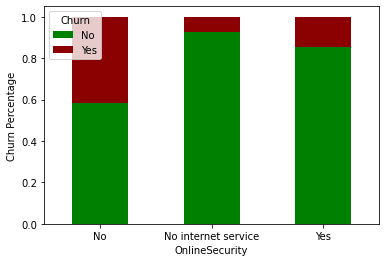

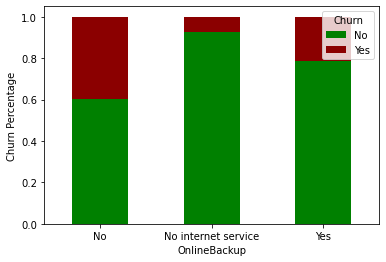

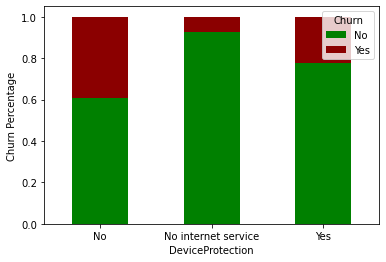

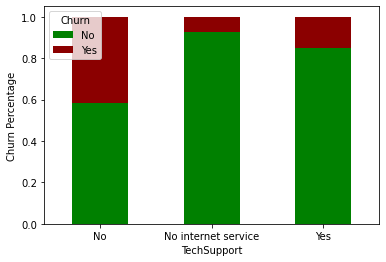

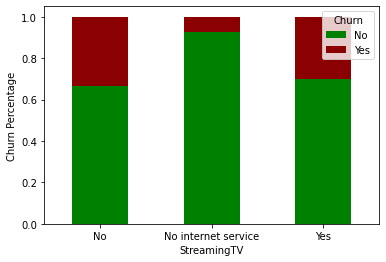

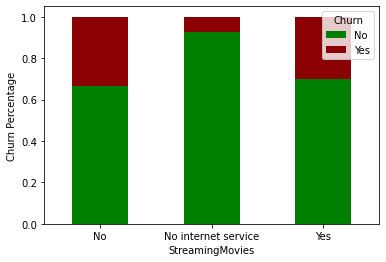

In [32]:
stacked_plot(new_data, "OnlineSecurity", "Churn")
stacked_plot(new_data, "OnlineBackup", "Churn")
stacked_plot(new_data, "DeviceProtection", "Churn")
stacked_plot(new_data, "TechSupport", "Churn")
stacked_plot(new_data, "StreamingTV", "Churn")
stacked_plot(new_data, "StreamingMovies", "Churn")

In all above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.

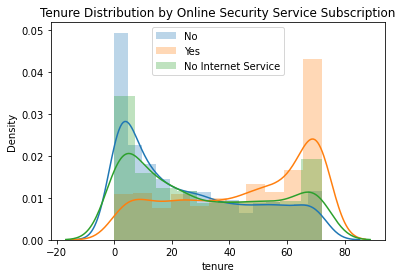

In [33]:
sns.distplot(new_data.tenure[new_data.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(new_data.tenure[new_data.OnlineSecurity == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(new_data.tenure[new_data.OnlineSecurity == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

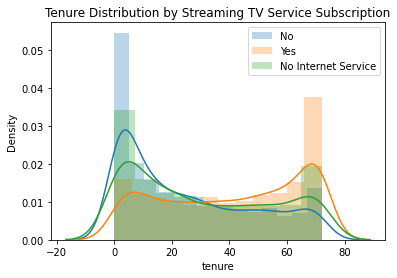

In [34]:
sns.distplot(new_data.tenure[new_data.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(new_data.tenure[new_data.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(new_data.tenure[new_data.StreamingTV == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

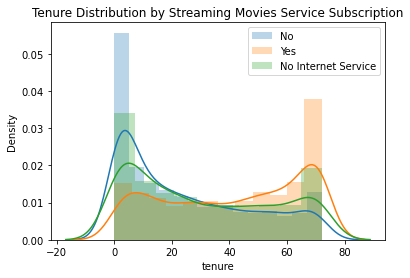

In [35]:
sns.distplot(new_data.tenure[new_data.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(new_data.tenure[new_data.StreamingMovies == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(new_data.tenure[new_data.StreamingMovies == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

As we can see, when the customers are new they do not opt for various services and their churning rate is very high.

#### InternetService

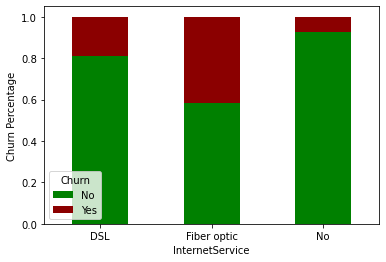

In [36]:
stacked_plot(new_data, "InternetService", "Churn")

When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides higher speed compared to DSL. The reason might be the higher cost of fiber optics.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

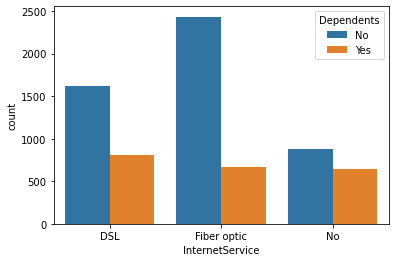

In [37]:
sns.countplot(new_data.InternetService, hue = new_data.Dependents)

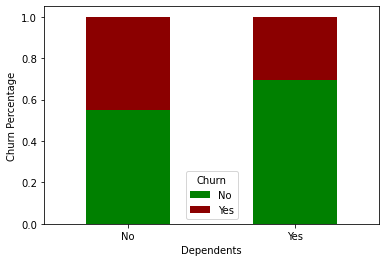

In [38]:
stacked_plot(new_data[new_data.InternetService == "Fiber optic"], "Dependents", "Churn")

Mostly people without dependents go for fiber optic option as Internnet Service and their churning percentage is high.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

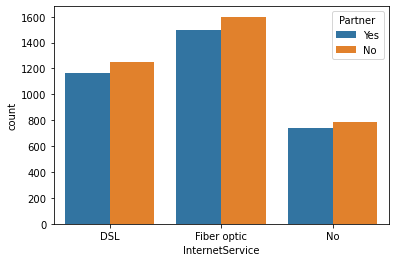

In [39]:
sns.countplot(new_data.InternetService, hue = new_data.Partner)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

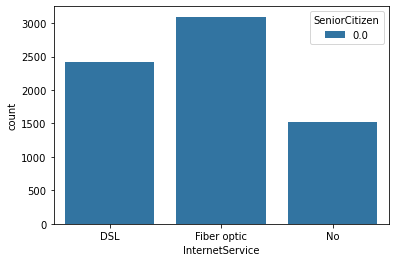

In [40]:
sns.countplot(new_data.InternetService, hue = new_data.SeniorCitizen)

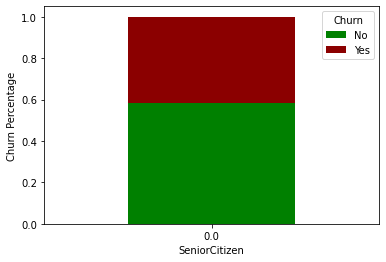

In [41]:
stacked_plot(new_data[new_data.InternetService == "Fiber optic"], "SeniorCitizen", "Churn")

As we can see, Partner and Senior Citizen do not tell us anything about why fiber optics have higher churning rate.



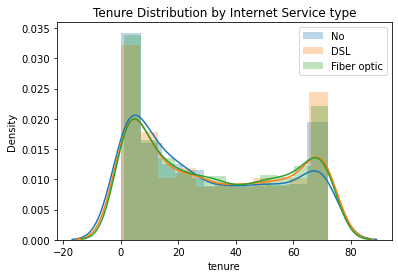

In [42]:
sns.distplot(new_data.tenure[new_data.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(new_data.tenure[new_data.InternetService == "DSL"], hist_kws=dict(alpha=0.3), label="DSL")
sns.distplot(new_data.tenure[new_data.InternetService == "Fiber optic"], hist_kws=dict(alpha=0.3), label="Fiber optic")
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

Also, the tenure distribution of customers with different internet service is similar.

#### Contract

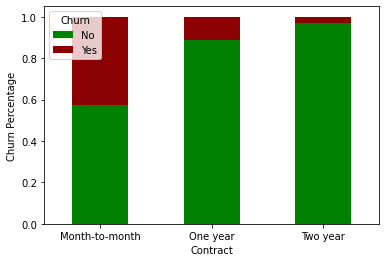

In [43]:
stacked_plot(new_data, "Contract", "Churn")

In the case of Month-to-month contract Churn rate is very high. There is also a posibility of having customers in the dataframe who are still in their two-year or one-year contract plan.

<AxesSubplot:xlabel='InternetService', ylabel='count'>

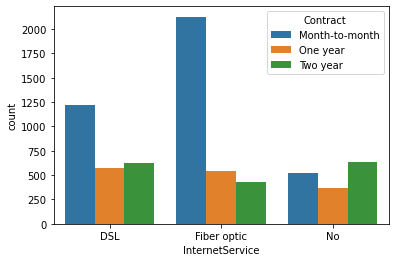

In [44]:
sns.countplot(new_data.InternetService, hue = new_data.Contract)

Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

#### Payment Method

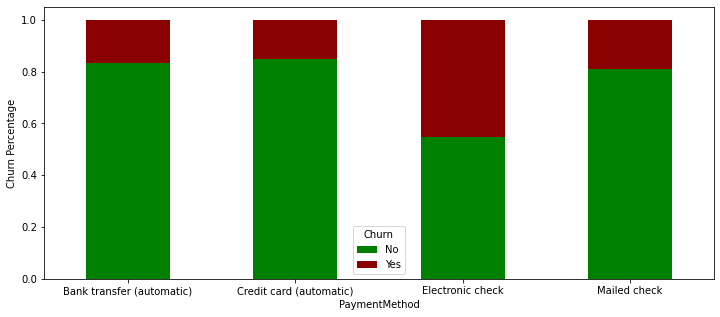

In [45]:
group = "PaymentMethod"
target = "Churn"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (new_data.groupby([group, target]).size()/new_data.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

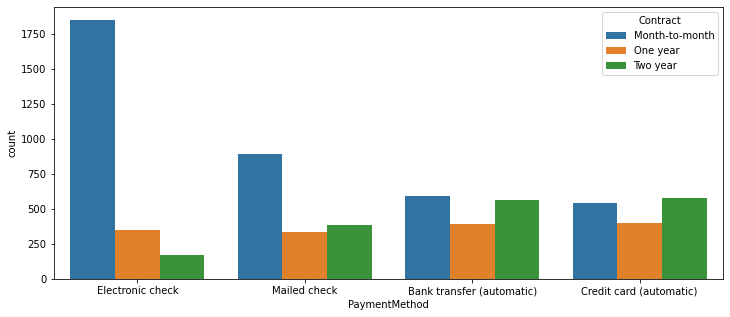

In [46]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(new_data.PaymentMethod, hue = new_data.Contract, ax = ax)

People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment.

#### PaperlessBilling

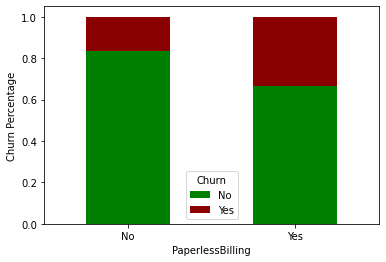

In [47]:
stacked_plot(new_data, "PaperlessBilling", "Churn")

In [48]:
new_data['TotalCharges'] = new_data["TotalCharges"].astype(float)

Churn = new_data[new_data.Churn=="Yes"]
Not_Churn = new_data[new_data.Churn=="No"]

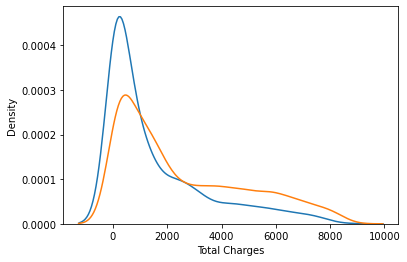

In [49]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");

The density of total charges for churning customers are high around 0. As many customers cancel the subsription in 1-2 months.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

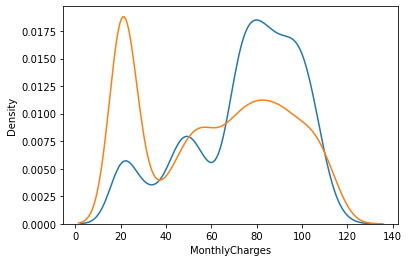

In [50]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")

The customers paying high monthly fees churn more.

Text(0.5, 1.0, 'Correlation Heatmap')

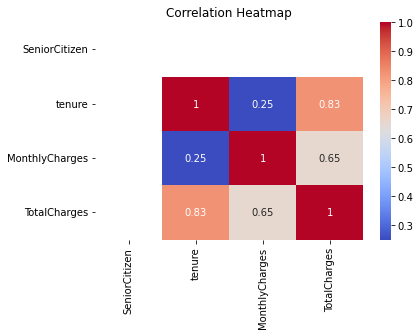

In [51]:
sns.heatmap(new_data.corr(), annot=True, cbar=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

## Identify the Target Variable and Splitting the Data into Train and Test

In [52]:
y = new_data['Churn']
X = new_data[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
              'Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

In [53]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


In [54]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3296,Female,0.0,No,No,24,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),49.30,1233.25
6397,Male,0.0,No,No,54,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),65.25,3529.95
6043,Male,0.0,No,No,3,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,40.15,130.75
5309,Female,0.0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.80
3000,Male,0.0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55


In [55]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [56]:
X_train.dtypes

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

### Separating Categorical and Numerical Columns

In [57]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,0.0,24,49.30,1233.25
6397,0.0,54,65.25,3529.95
6043,0.0,3,40.15,130.75
5309,0.0,61,20.25,1278.80
3000,0.0,12,84.45,1059.55


In [58]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3296,Female,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic)
6397,Male,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic)
6043,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check
5309,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
3000,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check


In [59]:
X_train_cat_nominal = X_train_cat[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                                   'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                                   'PaperlessBilling','PaymentMethod']]
X_train_cat_ordinal = X_train_cat[['Contract']]

In [60]:
X_train_cat_nominal.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
3296,Female,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Yes,Credit card (automatic)
6397,Male,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,No,Bank transfer (automatic)
6043,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Yes,Mailed check
5309,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Credit card (automatic)
3000,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Yes,Electronic check


In [61]:
X_train_cat_ordinal.head()

,Contract
3296,Month-to-month
6397,One year
6043,Month-to-month
5309,Two year
3000,Month-to-month


In [62]:
X_train_cat_nominal['gender'].value_counts(normalize=True)

Female    0.502272
Male      0.497728
Name: gender, dtype: float64

In [63]:
X_train_cat_nominal['MultipleLines'].value_counts(normalize=True)

No                  0.482772
Yes                 0.421242
No phone service    0.095986
Name: MultipleLines, dtype: float64

In [64]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat_nominal), 
                               columns=ohe.get_feature_names_out(X_train_cat_nominal.columns), 
                               index = X_train_cat_nominal.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6397,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5309,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [65]:
X_train_cat_le = pd.DataFrame(index=X_train_cat_ordinal.index)

X_train_cat_le.head()

""
3296
6397
6043
5309
3000


In [66]:
X_train_cat_ordinal.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [67]:
Contract_encoder = {'Month-to-month' : 1, 'One year' : 2, 'Two year' : 3}

X_train_cat_le['Contract'] = X_train_cat_ordinal['Contract'].apply(lambda x : Contract_encoder[x])

X_train_cat_le.head()

,Contract
3296,1
6397,2
6043,1
5309,3
3000,1


In [68]:
X_train_cat_transformed = pd.concat([X_train_cat_ohe, X_train_cat_le], axis=1)

X_train_cat_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
3296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
6397,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
6043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
5309,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
3000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [69]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),columns = X_train_num.columns,index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,0.0,-0.340191,-0.514314,-0.460284
6397,0.0,0.883210,0.017840,0.556508
6043,0.0,-1.196572,-0.819594,-0.948382
5309,0.0,1.168670,-1.483535,-0.440119
3000,0.0,-0.829552,0.658427,-0.537185


In [70]:
X_train_num_rescaled.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5282.0,5.282000e+03,5.282000e+03,5.282000e+03
mean,0.0,-1.107701e-16,-3.584158e-16,-3.840169e-17
std,0.0,1.000095e+00,1.000095e+00,1.000095e+00
min,0.0,-1.318912e+00,-1.550263e+00,-1.006268e+00
25%,0.0,-9.518918e-01,-9.663949e-01,-8.258984e-01
50%,0.0,-1.362912e-01,1.863278e-01,-3.879773e-01
75%,0.0,9.239896e-01,8.369237e-01,6.627499e-01
max,0.0,1.617250e+00,1.799472e+00,2.838659e+00


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [71]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
3296,0.0,-0.340191,-0.514314,-0.460284,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
6397,0.0,0.883210,0.017840,0.556508,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
6043,0.0,-1.196572,-0.819594,-0.948382,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
5309,0.0,1.168670,-1.483535,-0.440119,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
3000,0.0,-0.829552,0.658427,-0.537185,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


### Preparing Test Data

In [72]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2200,Female,0.0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25
4627,Male,0.0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50
3225,Female,0.0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85
2828,Male,0.0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45
3768,Female,0.0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40


In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 2200 to 450
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   float64
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   object

In [74]:
X_test.dtypes

gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [75]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,0.0,19,58.20,1045.25
4627,0.0,60,116.60,7049.50
3225,0.0,13,71.95,923.85
2828,0.0,1,20.45,20.45
3768,0.0,55,77.75,4266.40


In [76]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2200,Female,No,No,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check
4627,Male,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic)
3225,Female,No,No,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
2828,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
3768,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [77]:
X_test_cat_nominal = X_test_cat[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                                   'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                                   'PaperlessBilling','PaymentMethod']]
X_test_cat_ordinal = X_test_cat[['Contract']]

In [78]:
X_test_cat_nominal.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
2200,Female,No,No,Yes,No,DSL,No,Yes,No,No,Yes,No,No,Electronic check
4627,Male,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic)
3225,Female,No,No,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Yes,Electronic check
2828,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check
3768,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Yes,Credit card (automatic)


In [79]:
X_test_cat_ordinal.head()

,Contract
2200,One year
4627,One year
3225,Month-to-month
2828,Two year
3768,Month-to-month


In [80]:
X_test_cat_le = pd.DataFrame(index = X_test_cat_ordinal.index)

X_test_cat_le.head()

""
2200
4627
3225
2828
3768


In [81]:
X_test_cat_le['Contract'] = X_test_cat_ordinal['Contract'].apply(lambda x : Contract_encoder[x])
X_test_cat_le.head()

,Contract
2200,2
4627,2
3225,1
2828,3
3768,1


In [82]:
X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat_nominal),columns=ohe.get_feature_names_out(X_test_cat_nominal.columns),index = X_test_cat_nominal.index)
X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4627,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2828,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [83]:
X_test_cat_transformed = pd.concat([X_test_cat_ohe, X_test_cat_le], axis=1)

X_test_cat_transformed.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
2200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4627,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2
3225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
2828,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
3768,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1


In [84]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),columns = X_test_num.columns,index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,0.0,-0.544091,-0.217375,-0.543516
4627,0.0,1.127890,1.731076,2.114680
3225,0.0,-0.788772,0.241378,-0.597262
2828,0.0,-1.278132,-1.476862,-0.997214
3768,0.0,0.923990,0.434889,0.882549


In [85]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
2200,0.0,-0.544091,-0.217375,-0.543516,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4627,0.0,1.127890,1.731076,2.114680,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2
3225,0.0,-0.788772,0.241378,-0.597262,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
2828,0.0,-1.278132,-1.476862,-0.997214,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
3768,0.0,0.923990,0.434889,0.882549,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1


### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)

LogisticRegression()

In [87]:
y_test_pred = lr.predict(X_test_transformed)

In [88]:
from sklearn.metrics import accuracy_score

lr_score = accuracy_score(y_test, y_test_pred)
lr_score

0.8012492901760363

In [89]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No
4446,Yes,Yes
2234,No,No
5454,Yes,Yes
1278,No,No
578,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

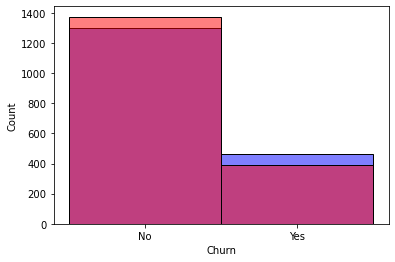

In [90]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### KNN Classification

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [92]:
y_test_pred = knn.predict(X_test_transformed)

In [93]:
from sklearn.metrics import accuracy_score

knn_score = accuracy_score(y_test, y_test_pred)
knn_score

0.7535491198182851

In [94]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No
4446,Yes,Yes
2234,No,No
5454,Yes,Yes
1278,No,No
578,No,Yes


<AxesSubplot:xlabel='Churn', ylabel='Count'>

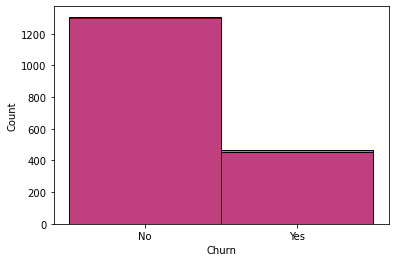

In [95]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [97]:
y_test_pred = dtc.predict(X_test_transformed)

In [98]:
from sklearn.metrics import accuracy_score

dtc_score = accuracy_score(y_test, y_test_pred)
dtc_score

0.7251561612720046

In [99]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,Yes
2828,No,No
3768,No,No
4446,Yes,Yes
2234,No,No
5454,Yes,Yes
1278,No,No
578,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

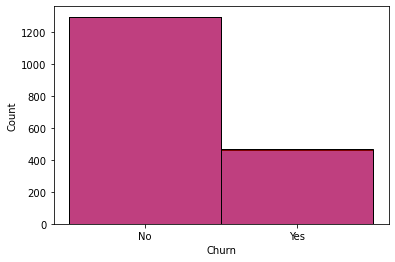

In [100]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### Naive Bayes Classification

In [101]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train_transformed, y_train)

GaussianNB()

In [102]:
y_test_pred = nbc.predict(X_test_transformed)

In [103]:
from sklearn.metrics import accuracy_score

nbc_score = accuracy_score(y_test, y_test_pred)
nbc_score

0.6695059625212947

In [104]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
2200,No,Yes
4627,No,No
3225,No,Yes
2828,No,No
3768,No,Yes
4446,Yes,Yes
2234,No,No
5454,Yes,Yes
1278,No,No
578,No,Yes


<AxesSubplot:xlabel='Churn', ylabel='Count'>

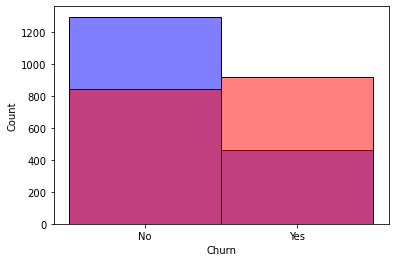

In [105]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### Support Vector Classifier

In [106]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed, y_train)

SVC()

In [107]:
y_test_pred = svc.predict(X_test_transformed)

In [108]:
from sklearn.metrics import accuracy_score

svc_score = accuracy_score(y_test, y_test_pred)
svc_score

0.7893242475865985

In [109]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No
4446,Yes,Yes
2234,No,No
5454,Yes,Yes
1278,No,No
578,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

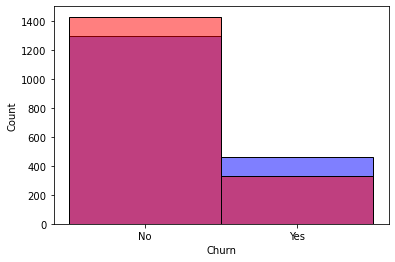

In [110]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [112]:
y_test_pred = rfc.predict(X_test_transformed)

In [113]:
from sklearn.metrics import accuracy_score

rfc_score = accuracy_score(y_test, y_test_pred)
rfc_score

0.7847813742191937

In [114]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No
4446,Yes,Yes
2234,No,No
5454,Yes,Yes
1278,No,No
578,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

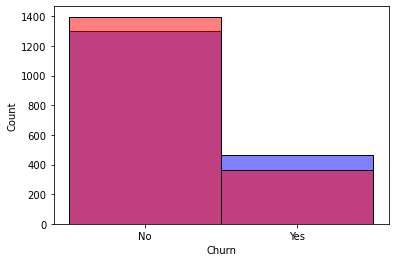

In [115]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

### Gradient Boost Classifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [117]:
y_test_pred = gbc.predict(X_test_transformed)

In [118]:
from sklearn.metrics import accuracy_score

gbc_score = accuracy_score(y_test, y_test_pred)
gbc_score

0.7893242475865985

In [119]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head(10)

,Actual,Predicted
2200,No,No
4627,No,No
3225,No,No
2828,No,No
3768,No,No
4446,Yes,Yes
2234,No,No
5454,Yes,Yes
1278,No,No
578,No,No


<AxesSubplot:xlabel='Churn', ylabel='Count'>

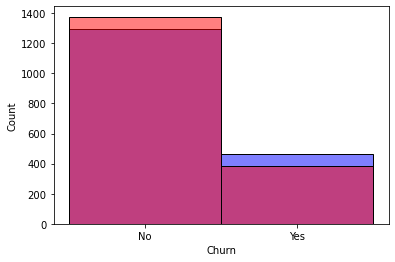

In [120]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [121]:
models = [('Logistic Regression',lr_score),
          ('KNN Clasification',knn_score),
          ('Decision Tree Classification',dtc_score),
          ('Naive Bayes Classification',nbc_score),
          ('Support Vector Classification',svc_score),
          ('Random Forest Classification',rfc_score),
          ('Gradient Boosting Classification',gbc_score)]

In [122]:
predict = pd.DataFrame(data = models, columns=['Algorithm','Accuracy_score'])
predict.sort_values(by = 'Accuracy_score', ascending = False)

,Algorithm,Accuracy_score
0,Logistic Regression,0.801249
4,Support Vector Classification,0.789324
6,Gradient Boosting Classification,0.789324
5,Random Forest Classification,0.784781
1,KNN Clasification,0.753549
2,Decision Tree Classification,0.725156
3,Naive Bayes Classification,0.669506


<AxesSubplot:xlabel='Accuracy_score', ylabel='Algorithm'>

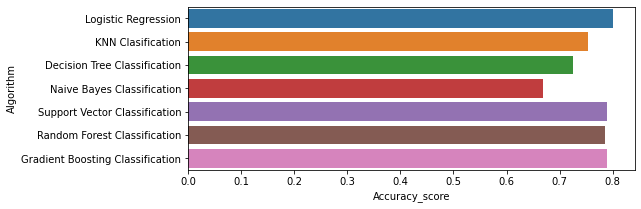

In [123]:
plt.figure(figsize = (8,3))
sns.barplot(x = predict['Accuracy_score'], y = predict['Algorithm'])

Conclusion:

In this project, by using a set of ML algorithms, a computational intelligence approach is applied to predict whether a customer will churn or not based on the given features. The given dataset was utilised for training and testing the Logistic Regression, KNN Classification, Support Vector Classification, NaiveBayes Classification,GradientBoosting Classification, Decision Tree and Random Forest Classification, ML algorithms. The classification analysis of this dataset followed the steps of data splitting, preprocessing, Fitting the classification models, and evaluation. The resultant outcome revealed that Logistic Regression achieved highest accuracy score.